# IRIS FLOWER CLASSIFICATION

## Import the Libraries

In [58]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

# Agglomerative Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

## Load the Data 

In [59]:
iris_df = pd.read_csv("C:/Users/Deepak/OneDrive/Desktop/CodSoft/Task-03/IRIS.csv")
x = iris_df.iloc[:, [0, 1, 2, 3]].values

## Data Pre-Processing

In [60]:
# Display basic information about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
# Display the first few rows of the dataset
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Feature Engineering

In [63]:
# Frequency distribution of species
iris_outcome = pd.crosstab(index=iris_df["species"], columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## Exploratory Data Analysis (EDA)

In [64]:
Set1 = ["#ff0000", "#00ff11", "#1e00ff"]

### Histograms

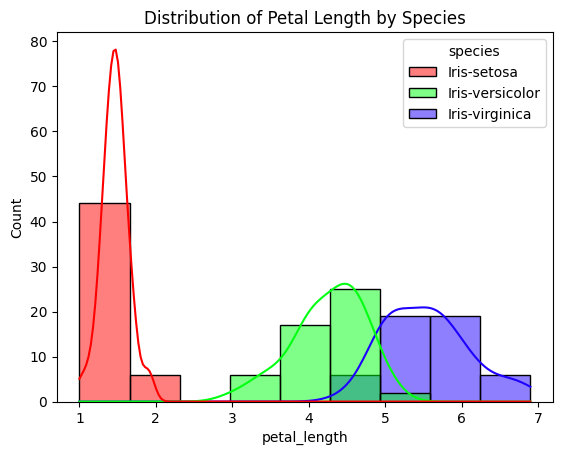

In [65]:
# Visualize the distribution of features by species
sns.histplot(data=iris_df, x="petal_length", hue="species", palette= Set1, kde=True)
plt.title("Distribution of Petal Length by Species")
plt.show()

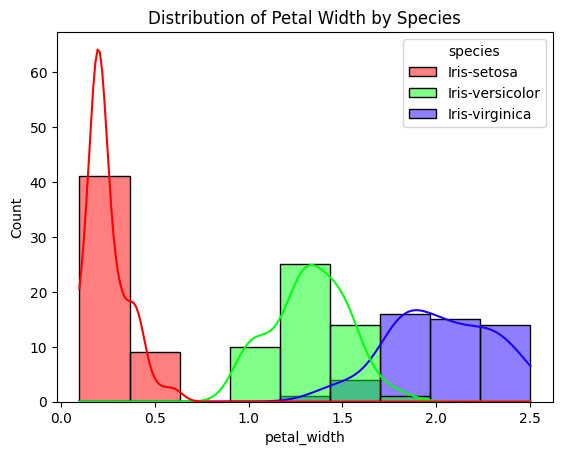

In [66]:
sns.histplot(data=iris_df, x="petal_width", hue="species", palette= Set1, kde=True)
plt.title("Distribution of Petal Width by Species")
plt.show()

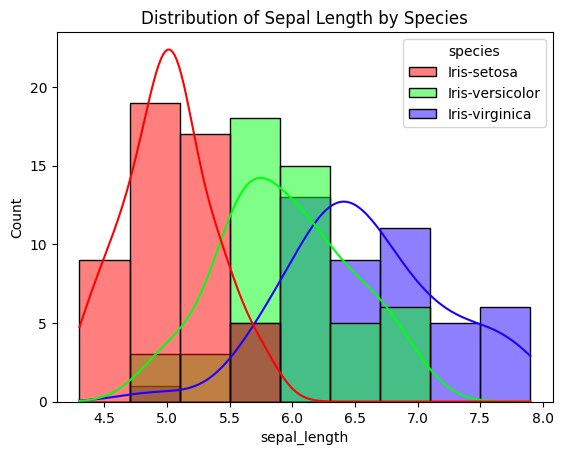

In [67]:
sns.histplot(data=iris_df, x="sepal_length", hue="species", palette= Set1, kde=True)
plt.title("Distribution of Sepal Length by Species")
plt.show()

### Boxplot

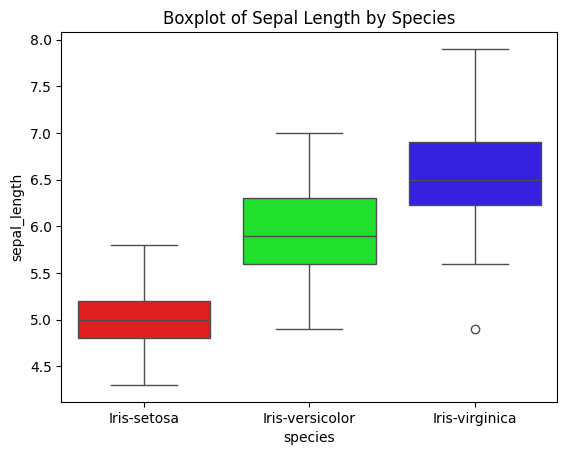

In [68]:
# Boxplot of sepal length by species
sns.boxplot(x="species", y="sepal_length", data=iris_df, hue="species", palette= Set1, legend=False)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

### Heatmap


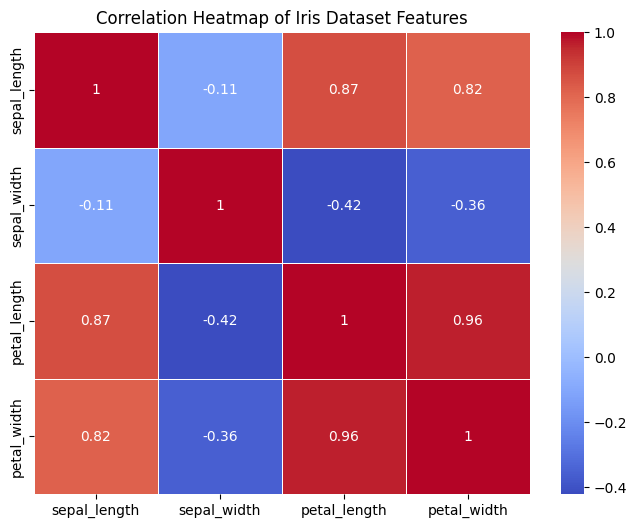

In [69]:
# Correlation heatmap excluding 'species' column
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()

### Pairplot

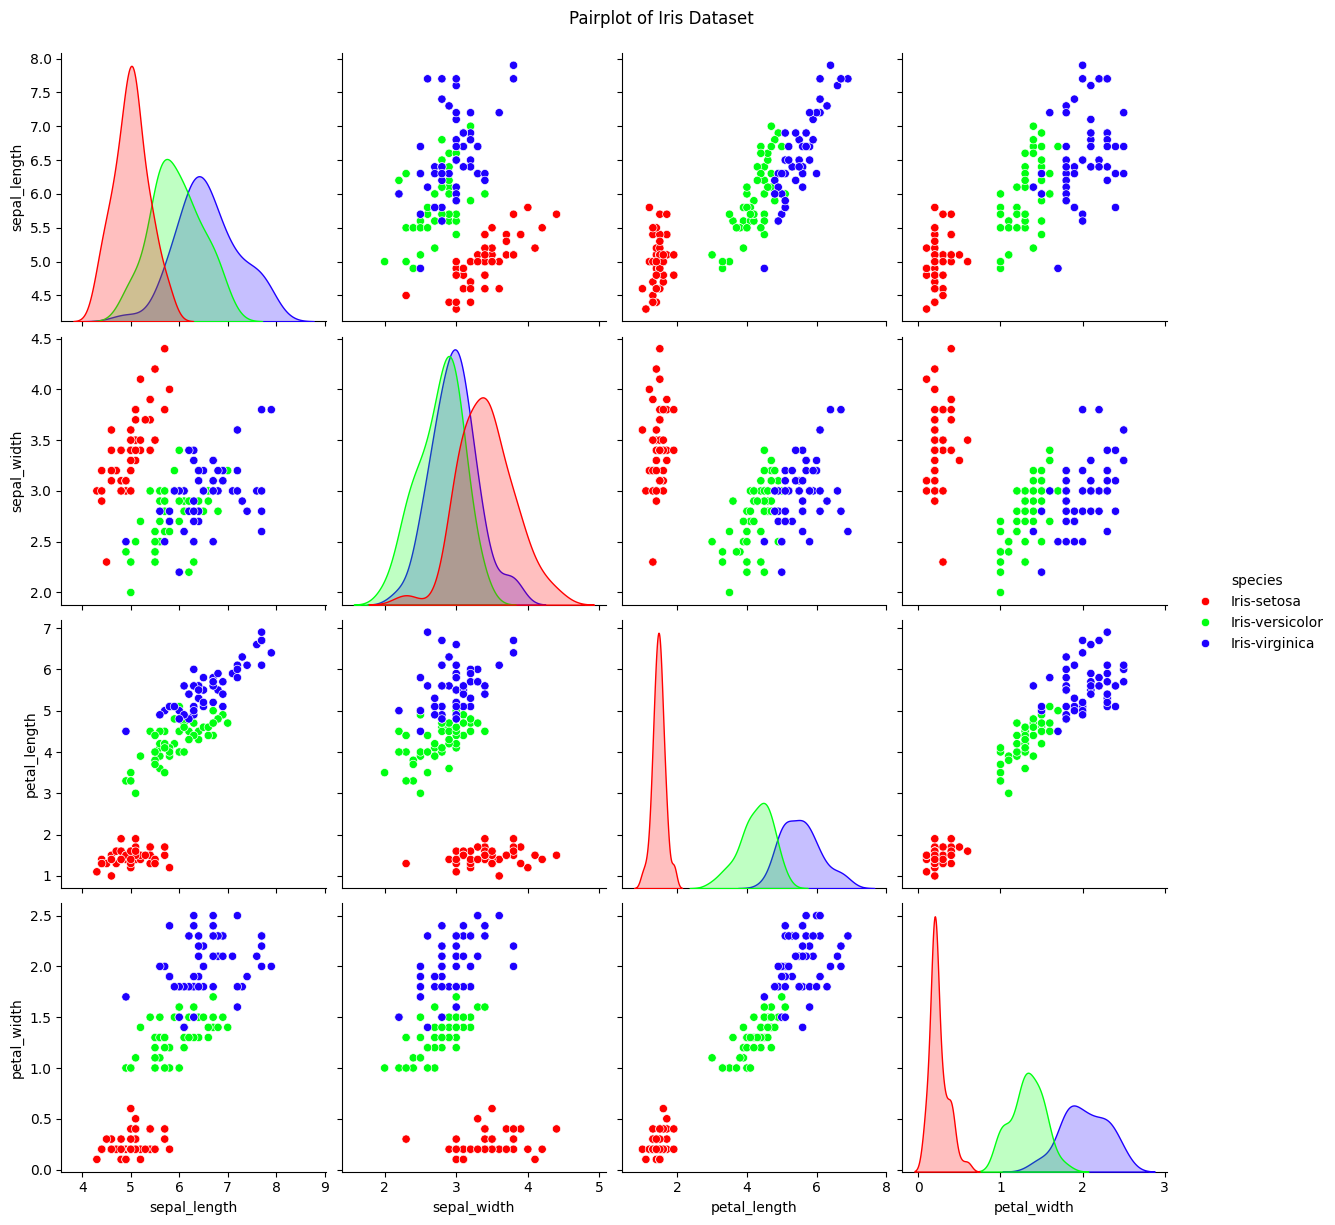

In [70]:
# Pairplot for pairwise relationships and distributions
sns.pairplot(data=iris_df, hue="species", palette=Set1, height=3)
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


## Agglomerative Hierarchical Clustering 

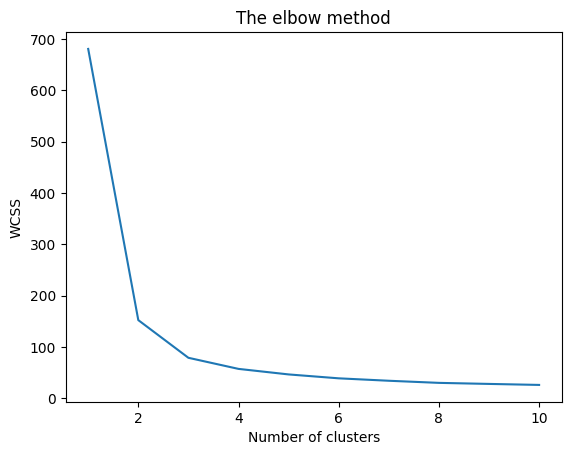

In [71]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [72]:
# Create an instance of AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)

In [73]:
# Fit the model to the data
y_agglomerative = agglomerative_clustering.fit_predict(x)

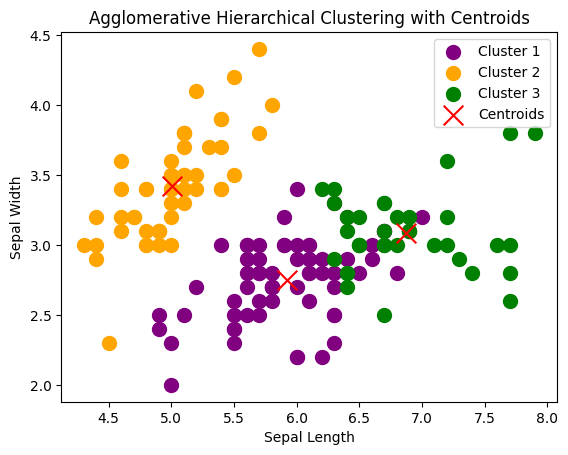

In [74]:
# Get centroids by calculating the mean of each cluster's data points
centroids = []
for i in range(3):
    cluster_mean = x[y_agglomerative == i].mean(axis=0)
    centroids.append(cluster_mean)

# Visualize the clusters and centroids
plt.scatter(x[y_agglomerative == 0, 0], x[y_agglomerative == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(x[y_agglomerative == 1, 0], x[y_agglomerative == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(x[y_agglomerative == 2, 0], x[y_agglomerative == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('Agglomerative Hierarchical Clustering with Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()